### Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Content

Though a little late in the day, the world is waking up to the deleterious effect of fossil fuels on our environment. As the doomsday clock ticks away, human beings are turning to renewable energy to avert a possible apocalypse. Fortunately, the sun is a well-spring of clean energy. Taking the cue, Wipro, in association with MachineHack, has designed a forecasting challenge to optimise solar power generation using ML models.

A solar power generation company wants to optimize solar power production and needs the prediction model to predict the Clearsky Global Horizontal Irradiance(GHI). The data is ten years at an interval of every 30 mins with the following data points:

<b> <u> 
['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Fill Flag', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed'] </b> </u>



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [ ]:
# Importing all datasets
train = pd.read_csv("/content/train.csv")
train.head(4)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0


In [ ]:
# Importing all datasets
test = pd.read_csv("/content/test.csv")
test.head(4)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN


In [ ]:
test['Clearsky DHI'] = 0

In [ ]:
test['Clearsky DNI'] = 0

In [ ]:
test['Clearsky GHI'] = 0

In [ ]:
test.head(4)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,0,0,0
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,0,0,0
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,0,0,0
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,0,0,0


### Checking the `missing` values 

In [ ]:
test.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
dtype: int64

In [ ]:
train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [ ]:
import seaborn as sns

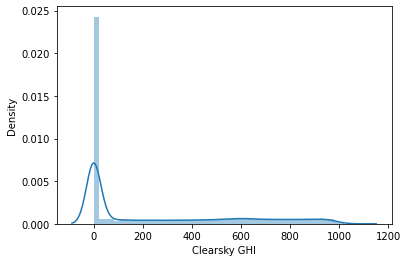

In [ ]:
sns.distplot(train['Clearsky GHI'])

## Feature Selection

In [ ]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train = train.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1)

In [ ]:
y_train = train[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]]

In [ ]:
X_test = test.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1)

In [ ]:
y_test = test[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]]

In [ ]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
selected_features = X_train.columns[(model.get_support())]

In [ ]:
selected_features

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
      dtype='object')

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
le_reg = LinearRegression()

In [ ]:
le_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
le_reg.intercept_

array([ 1429.26194411, -4441.28119549, -2410.75354253])

In [ ]:
le_reg.coef_

array([[-7.61485090e-01, -9.43775124e-01, -3.37973909e-02,
         1.17340264e+00,  6.21091597e-03,  7.67114588e-01,
         2.71028379e-01,  8.35208712e-02,  2.46372328e-01,
        -3.57802373e-01, -1.06308270e+00,  3.47254463e+00,
         5.13608003e-03,  3.88221691e+00, -2.70741841e-01],
       [ 1.43725240e+00,  1.39517726e+00,  1.01763709e-01,
         7.99314177e+00,  8.21458539e-02,  1.84970063e+00,
         7.64269419e+00, -5.11067317e+00,  2.64833040e+00,
        -4.65112436e+00, -5.93451903e+00, -2.67836333e+01,
         8.84628322e-03,  3.55323897e+01, -1.09174789e+00],
       [ 7.09843108e-01, -2.59564330e+00,  9.32441343e-03,
        -8.70916916e-01,  1.06267774e-01,  1.75370483e+00,
        -8.19396428e+00,  1.05065248e+01,  1.73962672e+00,
        -9.84874967e-01, -6.04011987e+00, -4.68107847e+00,
         2.25765686e-02,  2.73781424e+01, -2.44690271e+00]])

In [ ]:
print('The coefficient of determination R^2 for train set is: {}'.format(le_reg.score(X_train,y_train)))

The coefficient of determination R^2 for train set is: 0.8225004345046001


In [ ]:
print('The coefficient of determination R^2 for test set is: {}'.format(le_reg.score(X_test,y_test)))

The coefficient of determination R^2 for test set is: 0.0


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(le_reg,X_train,y_train,cv=5)

In [ ]:
score.mean()

0.664643048891186

In [ ]:
y_pred = le_reg.predict(X_test)

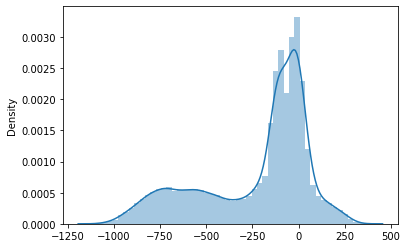

In [ ]:
sns.distplot(y_test-y_pred)

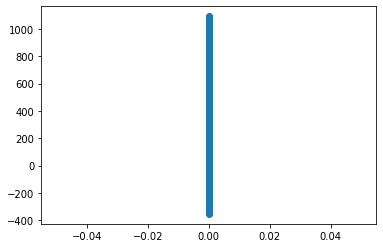

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE:  253.67335611044578
MSE:  138162.16726561854
RMSE:  15.927126423509225


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ri_reg =Ridge()

In [ ]:
parameters = {'alpha':[0.4,0.6,0.004,0.003,0.0004,0.07,3,0.005]}
ri_model = GridSearchCV(estimator=ri_reg,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [ ]:
ri_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.4, 0.6, 0.004, 0.003, 0.0004, 0.07, 3,
                                   0.005]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ri_model.best_params_)
print(ri_model.best_score_)

{'alpha': 3}
-26866.406957790932


In [ ]:
print('MSE for train set is: {}'.format(ri_model.score(X_train,y_train)))
print('MSE for train set is: {}'.format(ri_model.score(X_test,y_test)))

MSE for train set is: -13139.842897570088
MSE for train set is: -138162.07314585295


In [ ]:
rid_pred = ri_model.predict(X_test)

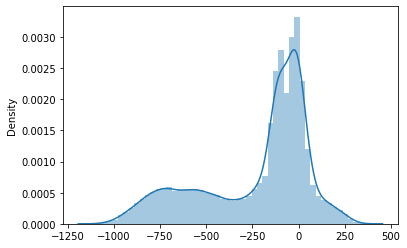

In [ ]:
sns.distplot(y_test-rid_pred)

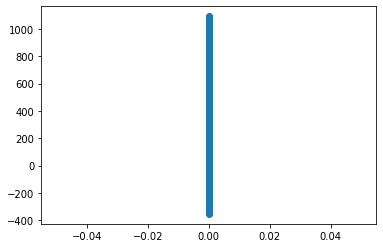

In [ ]:
plt.scatter(y_test,rid_pred)

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test,rid_pred))
print('MSE: ', metrics.mean_squared_error(y_test,rid_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,rid_pred)))

MAE:  253.67329675891497
MSE:  138162.07314585295
RMSE:  15.927124560287552


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
la_reg = Lasso()

In [ ]:
para =  {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [ ]:
las_model = RandomizedSearchCV(la_reg,para,cv=5,scoring='neg_mean_squared_error')

In [ ]:
las_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   scoring='neg_mean_squared_error')

In [ ]:
las_model.best_params_ , las_model.best_score_

({'alpha': 20}, -13781.451844796215)

In [ ]:
las_pred = las_model.predict(X_test)

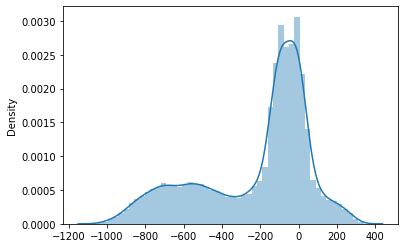

In [ ]:
sns.distplot(y_test-las_pred)

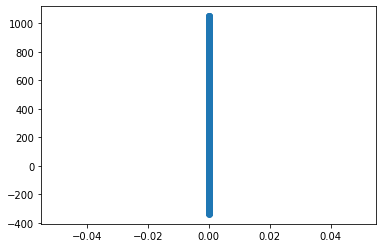

In [ ]:
plt.scatter(y_test,las_pred)

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test,las_pred))
print('MSE: ', metrics.mean_squared_error(y_test,las_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,las_pred)))

MAE:  251.0703051793761
MSE:  132349.20426166116
RMSE:  15.845198174190694


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor()

In [ ]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt_reg.score(X_train,y_train),dt_reg.score(X_test,y_test)

(1.0, 0.0)

In [ ]:
score = cross_val_score(dt_reg,X_train,y_train,cv=5)

In [ ]:
score.mean()

0.9436916835109068

In [ ]:
dt_pred = dt_reg.predict(X_test)

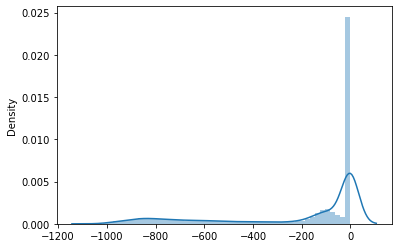

In [ ]:
sns.distplot(y_test-dt_pred)

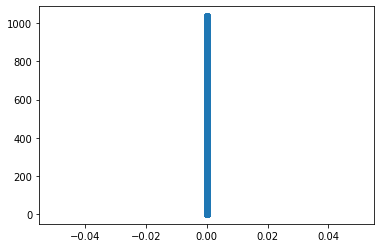

In [ ]:
plt.scatter(y_test,dt_pred)

In [ ]:
print('MAE ', metrics.mean_absolute_error(y_test,dt_pred))
print('MSE ', metrics.mean_squared_error(y_test,dt_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

MAE  213.83647260273972
MSE  143046.41386986303
RMSE  378.2147721465451


### Hyperparameter Optimization

In [ ]:
params = {"splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]}


In [ ]:
dtree_reg = GridSearchCV(dt_reg,params,cv=2,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3)

In [ ]:
def time(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,tsec = div_mod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(tsec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
start_time = None
dtree_reg.fit(X_train,y_train)
time(start_time)

Fitting 2 folds for each of 10240 candidates, totalling 20480 fits


datetime.datetime(2022, 1, 26, 15, 32, 31, 14815)

In [ ]:
dtree_reg.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
dtree_reg.best_score_

-4159.90159907397

In [ ]:
dtree_pred =dtree_reg.predict(X_test)

In [ ]:
dtree_reg.score(X_train,y_train),dtree_reg.score(X_test,y_test)

(-4213.449347587463, -137651.55424860833)

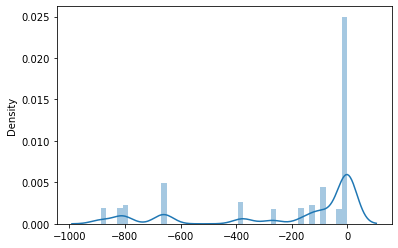

In [ ]:
sns.distplot(y_test-dtree_pred)

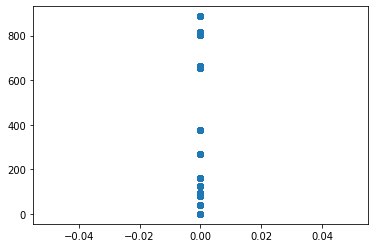

In [ ]:
plt.scatter(y_test,dtree_pred)

In [ ]:
print('MAE ', metrics.mean_absolute_error(y_test,dtree_pred))
print('MSE ', metrics.mean_squared_error(y_test,dtree_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,dtree_pred)))

MAE  213.24739235682148
MSE  137651.55424860833
RMSE  371.0142237820652


In [ ]:
##conda install pydotplus
## conda install python-graphviz

#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from six import StringIO
#from sklearn.tree import export_graphviz
#import pydotplus

In [ ]:
features = list(X_train.columns)
features

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag']

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)

(0.9975721001708807, 0.0)

In [ ]:
rf_pred = rf_reg.predict(X_test)

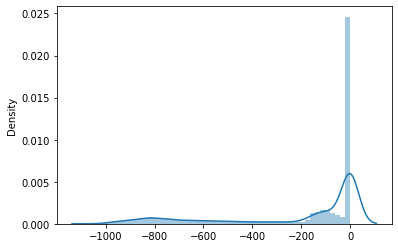

In [ ]:
sns.distplot(y_test-rf_pred)

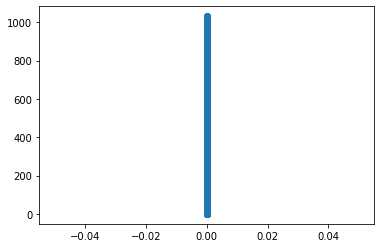

In [ ]:
plt.scatter(y_test,rf_pred)

In [ ]:
print('MAE ', metrics.mean_absolute_error(y_test,rf_pred))
print('MSE ', metrics.mean_squared_error(y_test,rf_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

MAE  213.82118911719922
MSE  142441.82631109303
RMSE  377.4146609646915


### Hyperparameter Tuning

In [ ]:
rf_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [ ]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

max_depth = [int(i) for i in np.linspace(5,30,num=6)]

min_weight_fraction_leaf =[0.1,0.2,0.4,0.5,0.7,0.6]

max_features = ['auto','sqrt']

min_samples_split = [4,5,7,10,15,100]

min_samples_leaf = [1,5,7,10]

In [ ]:
ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'max_features' : max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [ ]:
rand_reg = RandomizedSearchCV(rf_reg,param_distributions=ran_params,n_iter=1,cv=2,scoring='neg_mean_squared_error',verbose=3,n_jobs=-1)

In [ ]:
#rand_reg.fit(X_train,y_train)

In [ ]:
#rand_reg.best_params_

In [ ]:
#rand_reg.best_score_

In [ ]:
#rand_pred = rand_reg.predict(X_test)

In [ ]:
#sns.distplot(y_test-rand_pred)

In [ ]:
#plt.scatter(y_test,rand_pred)

In [ ]:
#print('MAE ', metrics.mean_absolute_error(y_test,rand_pred))
#print('MSE ', metrics.mean_squared_error(y_test,rand_pred))
#print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,rand_pred)))

In [ ]:
las_pred

array([[ 27.50025408,  79.45082623, 104.71008819],
       [ 19.28252605,  41.18711374,  65.15386818],
       [ 11.31562037,  18.40640644,  31.55373022],
       ...,
       [ 55.33347767, 421.77361296, 239.43558402],
       [ 47.5820013 , 397.84399571, 204.94085833],
       [ 39.82963907, 361.34685615, 168.35241829]])

In [ ]:
las_pred = pd.DataFrame(las_pred)

In [ ]:
las_pred.rename(columns = {0:'Clearsky DHI', 1: 'Clearsky DNI', 2: 'Clearsky GHI'}, inplace = True)

In [ ]:
las_pred.head(4)

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,27.500254,79.450826,104.710088
1,19.282526,41.187114,65.153868
2,11.315620,18.406406,31.553730
3,2.900562,-20.809796,-8.949410


In [ ]:
las_pred.to_csv("/content/output.csv")